**In-class activity N°2**

Group 2:

* Andrea Franco
* Andres Salguero
* Harpreet Kaur

# Libraries

In [198]:
import pandas as pd
import numpy as np
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## IV) Data Extraction

As the dataset has already been characterized, identified and acquired, we start the data lifecycle from the Data extraction.

In [199]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/class-activities/data_activity2.csv")
df

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.000000,0,1401,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.000000,0,1,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.000000,50,328,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973



## Step V : Data Validation and Cleansing
 For this we will check for null functions in our dataset using isnull function() and also check for unique values using unique function.

In [200]:
df.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

### Checking for unique values:

In [201]:
df.nunique()

symbol                     1
exchange                   1
date                      21
adjusted close            21
option symbol          13960
expiration                48
strike                   312
call/put                   2
style                      1
ask                    22926
bid                    22611
mean price             36172
iv                    146910
volume                  6205
open interest          14825
stock price for iv        21
*                          1
delta                 182814
vega                  179397
gamma                  28374
theta                  91796
rho                   183742
dtype: int64

### Dropping all the columns with only one unique value:


In [202]:
df = df.loc[:, df.nunique() > 1]

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                221046 non-null  object 
 1   adjusted close      221046 non-null  float64
 2   option symbol       221046 non-null  object 
 3   expiration          221046 non-null  object 
 4   strike              221046 non-null  float64
 5   call/put            221046 non-null  object 
 6   ask                 221046 non-null  float64
 7   bid                 221046 non-null  float64
 8   mean price          221046 non-null  float64
 9   iv                  221046 non-null  float64
 10  volume              221046 non-null  int64  
 11  open interest       221046 non-null  int64  
 12  stock price for iv  221046 non-null  float64
 13  delta               221046 non-null  float64
 14  vega                221046 non-null  float64
 15  gamma               221046 non-nul

### Dropping columns that do not give value to the target

In [204]:
data = df.copy()

In [205]:
data.drop(['expiration', 'option symbol'],axis=1, inplace=True)

### Converting Qualitative feature into Quantitative Feature:
Here ,we are converting call/put qualitative feature into Quantitative feature

In [206]:
le = LabelEncoder()

In [207]:
data['call/put'] = le.fit_transform(data['call/put'])
label_mapping1 = dict(enumerate(le.classes_))
print(label_mapping1)

{0: 'C', 1: 'P'}


## Step VI : Data aggregation and representation:
In this step we have to integrate multiple datasets into one single dataset. As the dataset we are dealing with does not have multiple datasets, we don't need to do this step and data is in the format of csv file.

## VII) Data Analysis

### 1. Target variable exploration

Text(0, 0.5, 'Frequency')

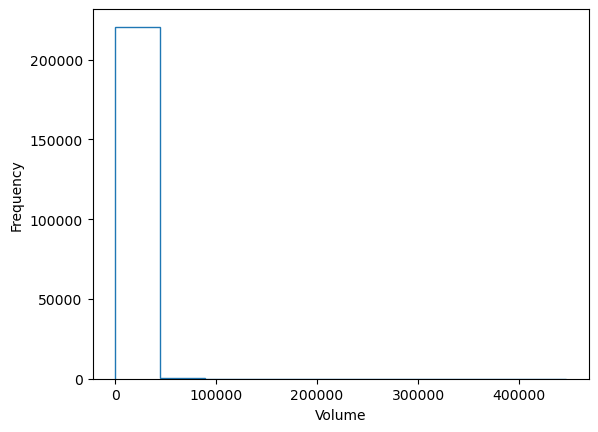

In [208]:
counts, bins = np.histogram(df['volume'])
plt.stairs(counts, bins)
plt.xlabel('Volume')
plt.ylabel('Frequency')

### 2. Numerical Variables Exploration

In [209]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('volume')  # Exclude the target variable

# Summary statistics of numerical variables
print(data[numerical_cols].describe())

       adjusted close         strike            ask            bid  \
count   221046.000000  221046.000000  221046.000000  221046.000000   
mean       435.089149     398.702076      41.667365      40.967420   
std          3.863763      93.725546      60.504762      59.876656   
min        424.970000      25.000000       0.010000       0.000000   
25%        432.930000     349.000000       1.660000       1.500000   
50%        435.460000     411.000000      15.910000      15.440000   
75%        438.510000     454.000000      52.550000      51.550000   
max        441.020000     655.000000     416.890000     415.230000   

          mean price             iv  open interest  stock price for iv  \
count  221046.000000  221046.000000  221046.000000       221046.000000   
mean       41.315752       0.234593    1660.743542          434.966436   
std        60.189057       0.225324    6040.663628            3.837734   
min         0.000000      -1.000000       0.000000          425.020000   

visualize relationships between numerical variables and volume

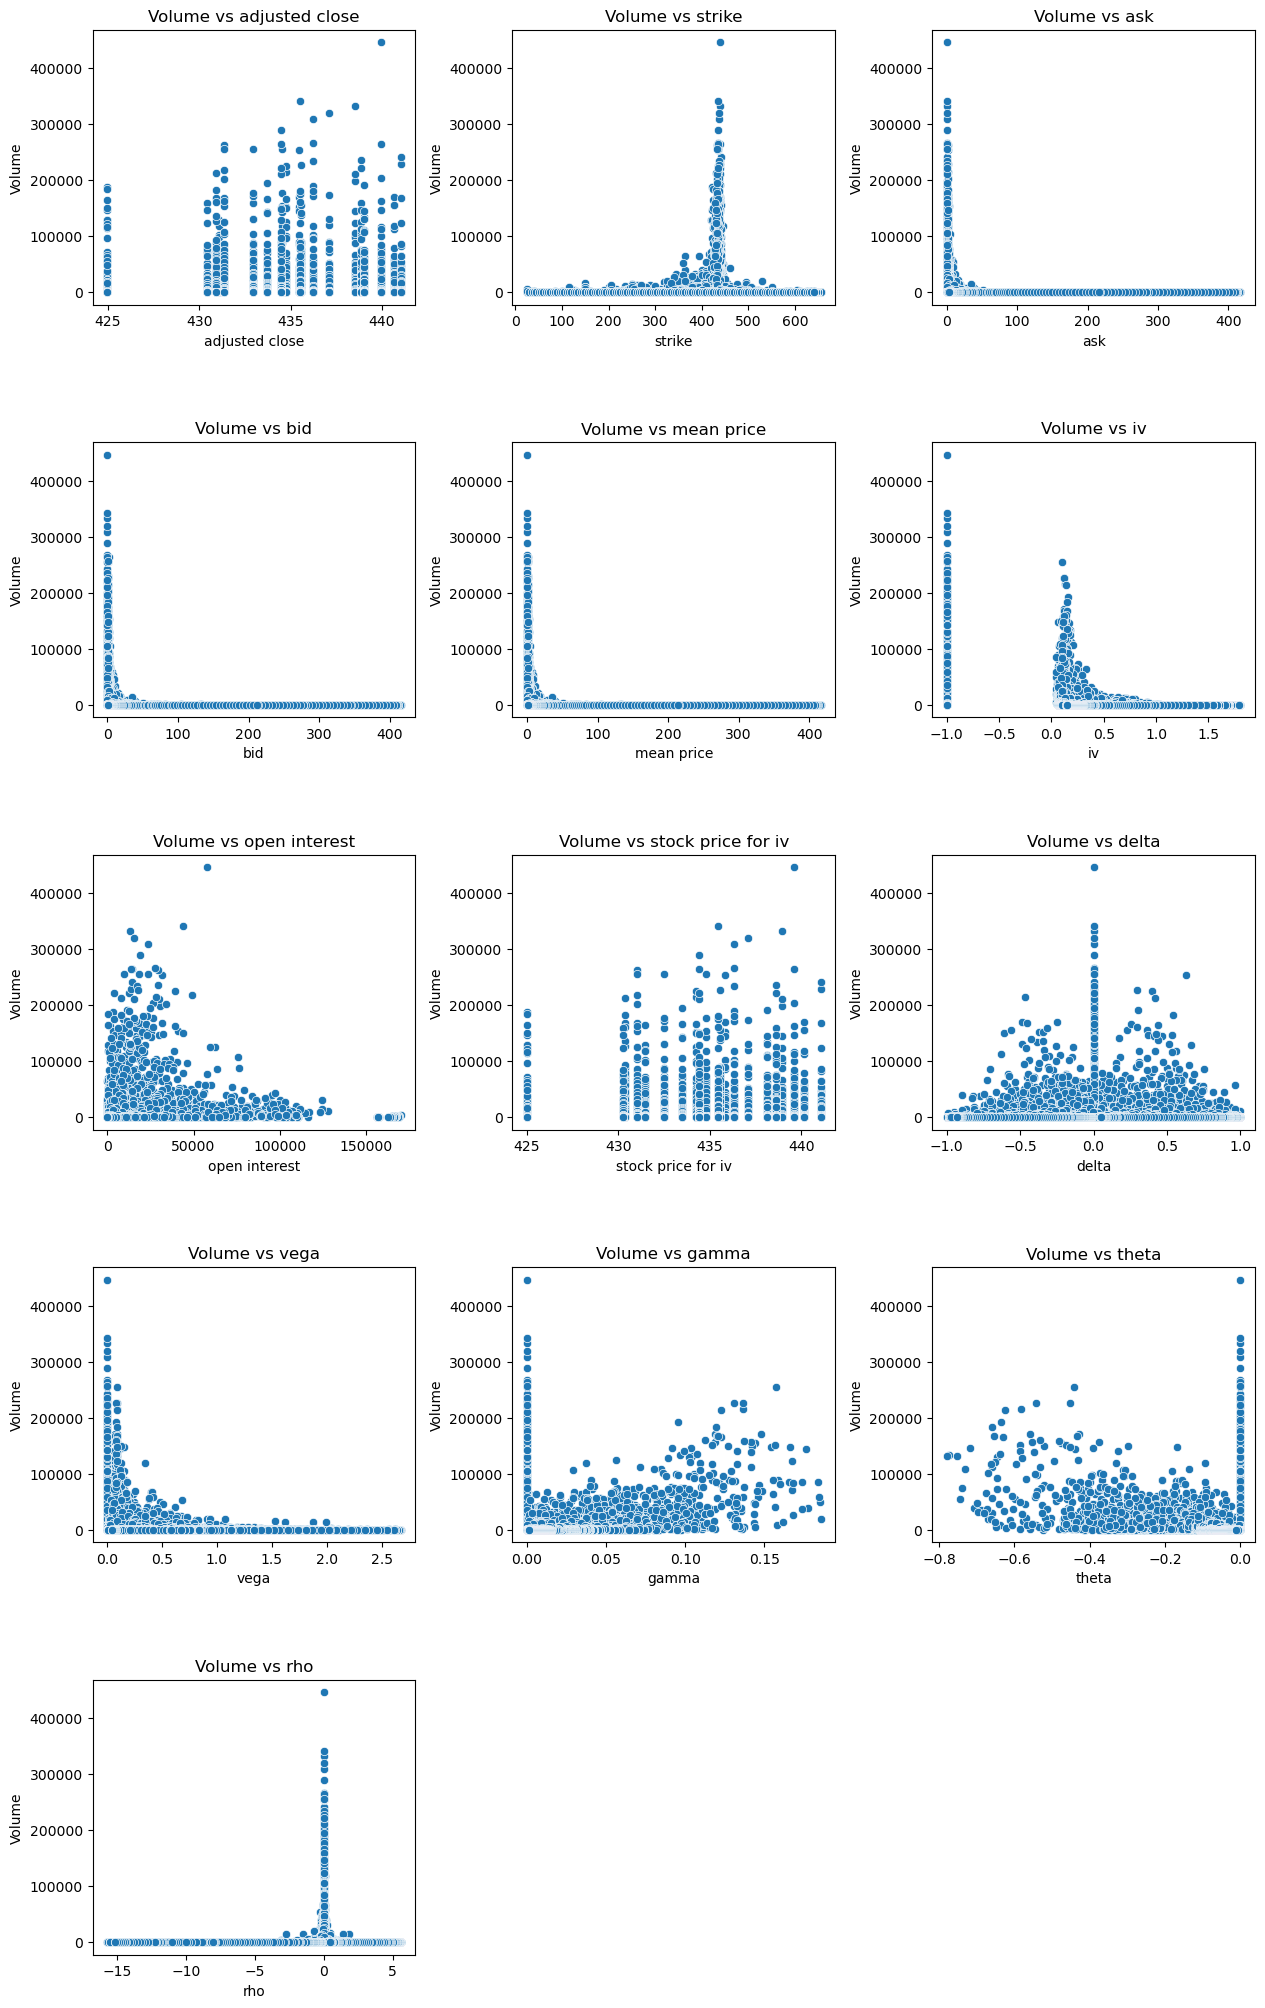

In [210]:
# Number of columns per row
num_cols = 3

# Number of rows needed
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable against 'volume'
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df[col], y=df['volume'], ax=axes[i])
    axes[i].set_title(f'Volume vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Volume')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 3. Finding the Correlation Between Variables

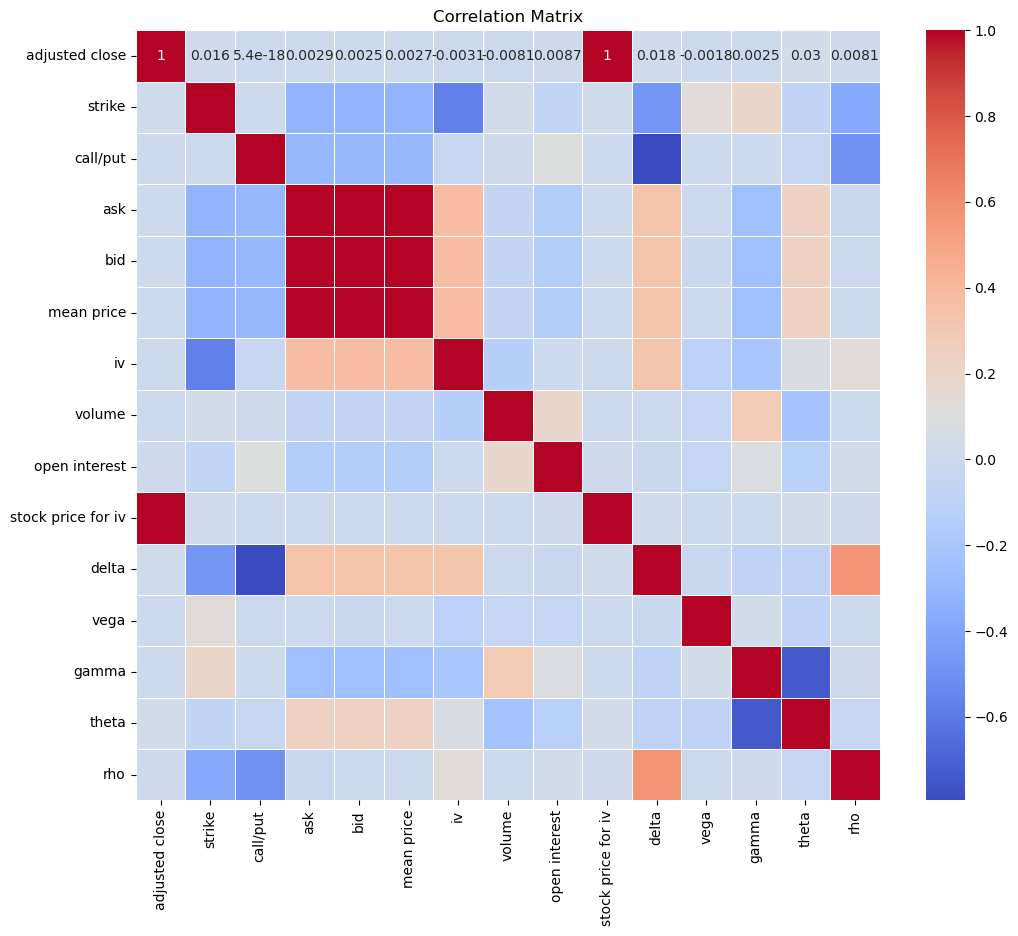

volume                1.000000
gamma                 0.278318
open interest         0.185569
strike                0.023565
call/put              0.009143
rho                   0.002718
adjusted close       -0.008051
stock price for iv   -0.008142
delta                -0.012911
vega                 -0.049532
bid                  -0.051600
mean price           -0.051761
ask                  -0.051920
iv                   -0.126601
theta                -0.226557
Name: volume, dtype: float64


In [211]:
# Correlation matrix
correlation_matrix = data.drop(columns='date').corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
print(correlation_matrix['volume'].sort_values(ascending=False))

### 4. Normalizing Values Using Standard Scaling

In [212]:

# Standard Scaling for numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

Checking the new ranges of the features

In [213]:
data.describe()

,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,2.210460e+05,2.210460e+05,221046.000000,2.210460e+05,2.210460e+05,2.210460e+05,2.210460e+05,221046.000000,2.210460e+05,2.210460e+05,2.210460e+05,2.210460e+05,2.210460e+05,2.210460e+05,2.210460e+05
mean,-6.706642e-15,-8.846184e-17,0.500000,-2.674428e-17,-5.091699e-17,-9.771948e-18,2.913583e-16,405.715661,-1.542939e-18,-3.130315e-14,-2.391556e-17,-1.512080e-16,-8.691890e-17,-1.902958e-16,-1.080057e-17
std,1.000002e+00,1.000002e+00,0.500001,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,5100.355521,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.618994e+00,-3.987205e+00,0.000000,-6.884989e-01,-6.841984e-01,-6.864345e-01,-5.479198e+00,0.000000,-2.749280e-01,-2.591753e+00,-1.794794e+00,-9.238570e-01,-6.091485e-01,-1.828957e+01,-9.077289e+00
25%,-5.588214e-01,-5.302950e-01,0.000000,-6.612282e-01,-6.591469e-01,-6.598515e-01,-4.213800e-01,0.000000,-2.747624e-01,-6.374703e-01,-5.586710e-01,-8.108306e-01,-5.309591e-01,-3.567018e-01,-4.395479e-02
50%,9.598206e-02,1.312124e-01,0.500000,-4.257090e-01,-4.263344e-01,-4.264199e-01,-1.227263e-01,0.000000,-2.583734e-01,1.233971e-01,-1.668603e-01,-3.843643e-01,-3.016182e-01,1.663623e-01,3.910412e-02
75%,8.853696e-01,5.899998e-01,1.000000,1.798645e-01,1.767401e-01,1.781765e-01,3.178321e-01,19.000000,-1.229576e-01,8.269389e-01,1.023253e+00,5.780013e-01,9.477344e-02,6.941884e-01,2.331096e-01
max,1.534997e+00,2.734564e+00,1.000000,6.201553e+00,6.250573e+00,6.226133e+00,6.969612e+00,446333.000000,2.785201e+01,1.585201e+00,1.461074e+00,3.988437e+00,1.959757e+01,1.053480e+00,3.273019e+00


### 5. Split the data into train and test subsets

As the business would like to predict the volume from July 30, 2021 based on the data for July 1 to July 29, 2023, we will take all of the observations from July 30 as our test set and all of the other data as our training set.

In [214]:
train_data = data[scaled_df['date'] != '07/30/2021']
test_data = data[scaled_df['date'] == '07/30/2021']

In [215]:
# check the data is correctly splitted
test_data

,date,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,07/30/2021,0.88537,-1.960004,0,3.022788,3.045978,3.034433,-5.479198,0,-0.274928,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
1,07/30/2021,0.88537,-1.960004,1,-0.688499,-0.684198,-0.686434,-5.479198,0,-0.042999,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
2,07/30/2021,0.88537,-1.906657,0,2.940149,2.962473,2.951361,-5.479198,0,-0.274762,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
3,07/30/2021,0.88537,-1.906657,1,-0.688499,-0.684198,-0.686434,-5.479198,50,-0.220629,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
4,07/30/2021,0.88537,-1.853310,0,2.857511,2.878968,2.868289,-5.479198,0,-0.274928,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,07/30/2021,0.88537,2.627869,1,2.848256,2.806318,2.827501,-0.537880,0,-0.274928,1.043213,-1.739821,-0.487923,-0.559382,0.873586,-8.715688
10722,07/30/2021,0.88537,2.681217,0,-0.656435,-0.656642,-0.656529,-0.383090,2,-0.232052,1.043213,-0.090487,0.289884,-0.503190,0.922324,0.297954
10723,07/30/2021,0.88537,2.681217,1,2.922630,2.881473,2.902266,-0.383090,0,-0.274928,1.043213,-1.685848,0.289884,-0.503190,0.779113,-8.603662
10724,07/30/2021,0.88537,2.734564,0,-0.658253,-0.664992,-0.661596,-0.395241,1,-0.217484,1.043213,-0.100942,0.154129,-0.513318,0.939065,0.263324


In [216]:
# check the data is correctly splitted
train_data

,date,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
10726,07/29/2021,1.439235,-1.960004,0,3.037663,3.068692,3.053207,0.248824,0,-0.274928,1.345475,1.460924,-0.923857,-0.609148,1.053480,0.042515
10727,07/29/2021,1.439235,-1.960004,1,-0.688499,-0.684198,-0.686434,0.403268,0,-0.042999,1.345475,-0.166860,-0.923857,-0.609148,1.053480,0.039104
10728,07/29/2021,1.439235,-1.906657,0,2.955024,2.985186,2.970135,0.248824,0,-0.274762,1.345475,1.460924,-0.923857,-0.609148,1.053480,0.042595
10729,07/29/2021,1.439235,-1.906657,1,-0.688499,-0.684198,-0.686434,0.403268,0,-0.220629,1.345475,-0.166860,-0.923857,-0.609148,1.053480,0.039104
10730,07/29/2021,1.439235,-1.853310,0,2.872386,2.901681,2.887064,0.248824,0,-0.274928,1.345475,1.460924,-0.923857,-0.609148,1.053480,0.042674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,07/01/2021,-1.205860,2.467827,1,2.724298,2.681061,2.702894,-0.382952,0,-0.274762,-1.226361,-1.671885,0.454314,-0.488053,0.777476,-8.565260
221042,07/01/2021,-1.205860,2.521175,0,-0.652303,-0.654137,-0.653206,-0.382930,0,-0.250758,-1.226361,-0.082813,0.381360,-0.494478,0.916892,0.326805
221043,07/01/2021,-1.205860,2.521175,1,2.806936,2.764566,2.785965,-0.382930,0,-0.274928,-1.226361,-1.677869,0.381360,-0.494478,0.785810,-8.656153
221044,07/01/2021,-1.205860,2.574522,0,-0.643544,-0.662487,-0.652957,-0.382930,5,-0.274762,-1.226361,-0.088443,0.311272,-0.500576,0.924085,0.307809


And divide the data in X (features) and y (target feature)

In [217]:
# target feature
y_train = train_data['volume']
y_train

10726     0
10727     0
10728     0
10729     0
10730     0
         ..
221041    0
221042    0
221043    0
221044    5
221045    0
Name: volume, Length: 210320, dtype: int64

In [218]:
y_test = test_data['volume']
y_test

0         0
1         0
2         0
3        50
4         0
         ..
10721     0
10722     2
10723     0
10724     1
10725     0
Name: volume, Length: 10726, dtype: int64

In [219]:
# features
X_train = train_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

#check that X doesn't have the target feature
X_train

,adjusted close,strike,call/put,ask,bid,mean price,iv,open interest,stock price for iv,delta,vega,gamma,theta,rho
10726,1.439235,-1.960004,0,3.037663,3.068692,3.053207,0.248824,-0.274928,1.345475,1.460924,-0.923857,-0.609148,1.053480,0.042515
10727,1.439235,-1.960004,1,-0.688499,-0.684198,-0.686434,0.403268,-0.042999,1.345475,-0.166860,-0.923857,-0.609148,1.053480,0.039104
10728,1.439235,-1.906657,0,2.955024,2.985186,2.970135,0.248824,-0.274762,1.345475,1.460924,-0.923857,-0.609148,1.053480,0.042595
10729,1.439235,-1.906657,1,-0.688499,-0.684198,-0.686434,0.403268,-0.220629,1.345475,-0.166860,-0.923857,-0.609148,1.053480,0.039104
10730,1.439235,-1.853310,0,2.872386,2.901681,2.887064,0.248824,-0.274928,1.345475,1.460924,-0.923857,-0.609148,1.053480,0.042674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,-1.205860,2.467827,1,2.724298,2.681061,2.702894,-0.382952,-0.274762,-1.226361,-1.671885,0.454314,-0.488053,0.777476,-8.565260
221042,-1.205860,2.521175,0,-0.652303,-0.654137,-0.653206,-0.382930,-0.250758,-1.226361,-0.082813,0.381360,-0.494478,0.916892,0.326805
221043,-1.205860,2.521175,1,2.806936,2.764566,2.785965,-0.382930,-0.274928,-1.226361,-1.677869,0.381360,-0.494478,0.785810,-8.656153
221044,-1.205860,2.574522,0,-0.643544,-0.662487,-0.652957,-0.382930,-0.274762,-1.226361,-0.088443,0.311272,-0.500576,0.924085,0.307809


In [220]:
# features
X_test = test_data.drop(columns=['volume','date']) # we also drop date as it is not necessary for our model training

#check that X doesn't have the target feature
X_test

,adjusted close,strike,call/put,ask,bid,mean price,iv,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,0.88537,-1.960004,0,3.022788,3.045978,3.034433,-5.479198,-0.274928,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
1,0.88537,-1.960004,1,-0.688499,-0.684198,-0.686434,-5.479198,-0.042999,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
2,0.88537,-1.906657,0,2.940149,2.962473,2.951361,-5.479198,-0.274762,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
3,0.88537,-1.906657,1,-0.688499,-0.684198,-0.686434,-5.479198,-0.220629,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
4,0.88537,-1.853310,0,2.857511,2.878968,2.868289,-5.479198,-0.274928,1.043213,-0.166860,-0.923857,-0.609148,1.053480,0.039104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,0.88537,2.627869,1,2.848256,2.806318,2.827501,-0.537880,-0.274928,1.043213,-1.739821,-0.487923,-0.559382,0.873586,-8.715688
10722,0.88537,2.681217,0,-0.656435,-0.656642,-0.656529,-0.383090,-0.232052,1.043213,-0.090487,0.289884,-0.503190,0.922324,0.297954
10723,0.88537,2.681217,1,2.922630,2.881473,2.902266,-0.383090,-0.274928,1.043213,-1.685848,0.289884,-0.503190,0.779113,-8.603662
10724,0.88537,2.734564,0,-0.658253,-0.664992,-0.661596,-0.395241,-0.217484,1.043213,-0.100942,0.154129,-0.513318,0.939065,0.263324


### 6. Build a machine-learning model

The next step is to build a ML model. As the problem requires make a forecast of our target feature, being that feature a continue numerical variable, the chosen model is a regression algorithm. 

#### Linear regression
From Scikit Learn library we create an instance of the linear regression model:

In [221]:
reg = linear_model.LinearRegression()

Then, with .fit we can use train the model by adjusting data from X to Y.

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [222]:
reg.fit(X_train,y_train)

#Visualize coefficients from the model
reg.coef_

array([   84.17286885,  -494.71668589,  -359.63568273, 14925.97490331,
       -5294.78173843, -9264.75355351,  -758.22873476,   833.62560116,
        -118.00259526,  -198.78139057,  -384.41757795,  1079.7731169 ,
        -440.12403612,   -57.66549378])

#### Polynomial regression

In [ ]:
#mymodel = np.poly1d(np.polyfit(X_train, y_train, 3))

Evaluate the model with r2_score

In [ ]:
#print(r2_score(y_test, mymodel(X_test))

#### Evaluation Metrics For Regression

Finally, we check the performance of the model with help of evaluation metrics. For Regression algorithms it is widely use mean_absolute_error, and mean_squared_error metrics for this purpose.

In [224]:
y_pred = reg.predict(X_test) 

In [225]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
  
print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 1143.0847814179829
MSE: 28834350.296369113
RMSE: 5369.762592179389


* MAE (1143.08): The model's predictions are off by an average of approximately 1143 units from the actual target values. This represents a moderate level of error.
* RMSE (5369.76): On average, the model's predictions are off by around 5370 units from the actual target values. This is a significant error considering the target variable's range.
* MSE (very high): This is the key to understanding the high error. As mentioned earlier, MSE squares the errors before averaging. Since you have some larger errors (as suggested by the higher RMSE compared to MAE), squaring them inflates their impact and significantly increases the MSE value.

Are these good values?

No, these values wouldn't be considered good for a regression model predicting a target variable between 0 and 446333. An MAE of over 1000 and an RMSE of over 5000 indicate that the model's predictions deviate considerably from the actual values on average.

Why is MSE so high?

The high MSE is primarily due to the presence of larger errors in the model's predictions. Squaring these errors in the MSE calculation amplifies their influence, leading to a much higher value compared to MAE, which only considers the absolute difference.

In [233]:
# Get the minimum and maximum values of target variable
min_target_value = data['volume'].min()
max_target_value = data['volume'].max()

print(f'Min target value: {min_target_value}\nMax target value: {max_target_value}')

# Normalize the error by the target variable range and express as a percentage
normalized_mae = (mae / (max_target_value - min_target_value)) * 100
normalized_mse = (mse / (max_target_value - min_target_value)) * 100
normalized_rmse = (rmse / (max_target_value - min_target_value)) * 100


print(f"Normalized MAE (as %): {normalized_mae:.2f}%")
print(f"Normalized MSE (as %): {normalized_mse:.2f}%")
print(f"Normalized RMSE (as %): {normalized_rmse:.2f}%")

Min target value: 0
Max target value: 446333
Normalized MAE (as %): 0.26%
Normalized MSE (as %): 6460.28%
Normalized RMSE (as %): 1.20%


The interpretation of these normalized error values provides a clearer picture of our model's performance:

* **Normalized MAE (0.26%)**: This indicates a decent level of accuracy. On average, the model's predictions are off by only 0.26% of the target variable's range (0 to 446333).
* **Normalized RMSE (1.20%)**: Similar to MAE, this suggests a moderate level of error. The model's predictions deviate from the actual values by an average of 1.20% of the target variable's range.
* **Normalized MSE (**highly inflated**, 6460.28%)**: This value is misleading due to the squaring effect in MSE. Even though the average error is captured well by normalized MAE and RMSE, some larger errors are likely present in the data. Squaring them in MSE significantly inflates their contribution, leading to this high normalized value.

**Key takeaways:**

* Despite the high MSE, the model seems to capture the overall trend of the target variable reasonably well, with an average error of around 1% when considering the entire range. 
* The presence of larger errors might be impacting the MSE more significantly.

**What to consider next:**

* Analyze the distribution of errors. Are there outliers causing the high MSE? Techniques like outlier detection and removal might be helpful. 
* Depending on your application's needs, a 1% average error might be acceptable. However, if minimizing large errors is crucial, you might need to explore model improvements. This could involve:
    * Trying different algorithms or feature engineering techniques.
    * Tuning hyperparameters of the current model.
    * Using robust regression methods less sensitive to outliers.

**Overall:**

The normalized MAE and RMSE suggest a reasonable model performance for capturing the general trend of the target variable. However, the high normalized MSE indicates potential outliers or large errors that might require further investigation or model adjustments depending on your specific requirements.  

### 7. Perform a cross-validation technique

One way to use cross-validation is to call the cross_val_score function on the estimator and the dataset.

The following code cell estimates the accuracy of a linear regression on our dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [226]:
#if not specified, the metric evaluated is MSE in the case of regression models by default
scores = cross_val_score(reg, X_train, y_train, cv=5)
scores

array([0.11766352, 0.14838699, 0.13558817, 0.09209494, 0.13924432])

## VIII) Data Visualization

# References

* https://scikit-learn.org/stable/modules/linear_model.html
* https://www.w3schools.com/python/python_ml_polynomial_regression.asp
* https://scikit-learn.org/stable/modules/cross_validation.html
